In [ ]:
conda install -c PyAudio

In [1]:
#Install all the Reqiuired Libraries and Packages 
import os
import glob
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc , logfbank
import librosa as lr
import os, glob, pickle
import librosa
from scipy import signal
import noisereduce as nr
from glob import glob
import librosa
get_ipython().magic('matplotlib inline')
#All the Required Packages and Libraies are installed.
import soundfile
from sklearn.model_selection import train_test_split

In [2]:
#Loading the required RAVDESS DataSet with length of 1439 Audio Files 
os.listdir(path='.\speech-emotion-recognition-ravdess-data')
def getListOfFiles(dirName):
    listOfFile=os.listdir(dirName)
    allFiles=list()
    for entry in listOfFile:
        fullPath=os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles=allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles

dirName = './speech-emotion-recognition-ravdess-data'
listOfFiles = getListOfFiles(dirName)
len(listOfFiles)

1439

In [6]:
#Now Cleaning Step is Performed where:
#DOWN SAMPLING OF AUDIO FILES IS DONE  AND PUT MASK OVER IT AND DIRECT INTO CLEAN FOLDER
#MASK IS TO REMOVE UNNECESSARY EMPTY VOIVES AROUND THE MAIN AUDIO VOICE 
def envelope(y , rate, threshold):
    mask=[]
    y=pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/10) ,  min_periods=1 , center = True).mean()
    for mean in y_mean:
        if mean>threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask

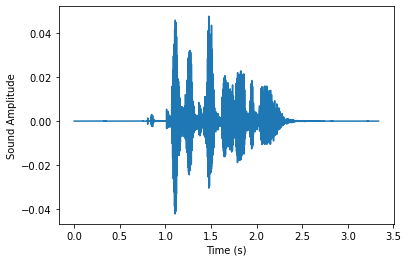

C:\Users\bhagw\AppData\Local\Temp/ipykernel_6316/2838050798.py:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(times, frequencies, spectrogram)


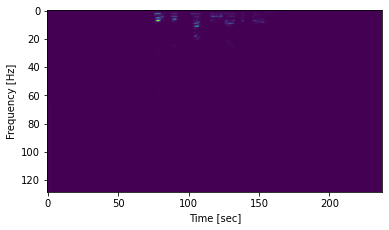

In [3]:
#Plotting the Basic Graphs for understanding of Audio Files :
for file in range(0 ,1):#len(listOfFiles) , 1):
    audio , sfreq = lr.load(listOfFiles[file])
    time = np.arange(0 , len(audio)) / sfreq
    
    fig ,ax = plt.subplots()
    ax.plot(time , audio)
    ax.set(xlabel = 'Time (s)' , ylabel = 'Sound Amplitude')
    plt.show()
    
#PLOT THE SEPCTOGRAM
for file in range(0,1):
    sample_rate , samples = wavfile.read(listOfFiles[file])
    frequencies , times, spectrogram = signal.spectrogram(samples, sample_rate) 
    plt.pcolormesh(times, frequencies, spectrogram)
    plt.imshow(spectrogram)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()

In [4]:
#Next Step is In-Depth Visualisation of Audio Fiels and its certain features to plot for.
#They are the Plotting Functions to be called later. 
def plot_signals(signals):
    fig , axes = plt.subplots(nrows=2, ncols=5,sharex =False , sharey=True, figsize=(20,5))
    fig.suptitle('Time Series' , size=16)
    i=0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(signals.keys())[i])
            axes[x,y].plot(list(signals.values())[i])
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1

def plot_fft(fft):
    fig , axes = plt.subplots(nrows=2, ncols=5,sharex =False , sharey=True, figsize=(20,5))
    fig.suptitle('Fourier Transform' , size=16)
    i=0
    for x in range(2):
        for y in range(5):
            data = list(fft.values())[i]
            Y,freq = data[0] , data[1]
            axes[x,y].set_title(list(fft.keys())[i])
            axes[x,y].plot(freq , Y)
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1
    
def plot_fbank(fbank):
    fig , axes = plt.subplots(nrows=2, ncols=5,sharex =False , sharey=True, figsize=(20,5))
    fig.suptitle('Filter Bank Coefficients' , size=16)
    i=0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(fbank.keys())[i])
            axes[x,y].imshow(list(fbank.values())[i],cmap='hot', interpolation = 'nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1
            
def plot_mfccs(mfccs):
    fig , axes = plt.subplots(nrows=2, ncols=5,sharex =False , sharey=True, figsize=(20,5))
    fig.suptitle('Mel Frequency Capstrum  Coefficients' , size=16)
    i=0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(mfccs.keys())[i])
            axes[x,y].imshow(list(mfccs.values())[i],
                             cmap='hot', interpolation = 'nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1

def calc_fft(y,rate):
    n = len(y)
    freq = np.fft.rfftfreq(n , d= 1/rate)
    Y= abs(np.fft.rfft(y)/n)
    return(Y,freq)

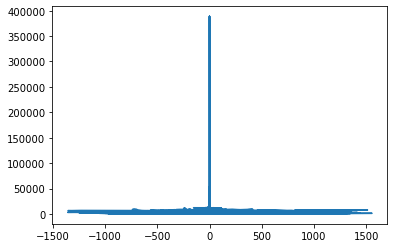

IndexError: list index out of range

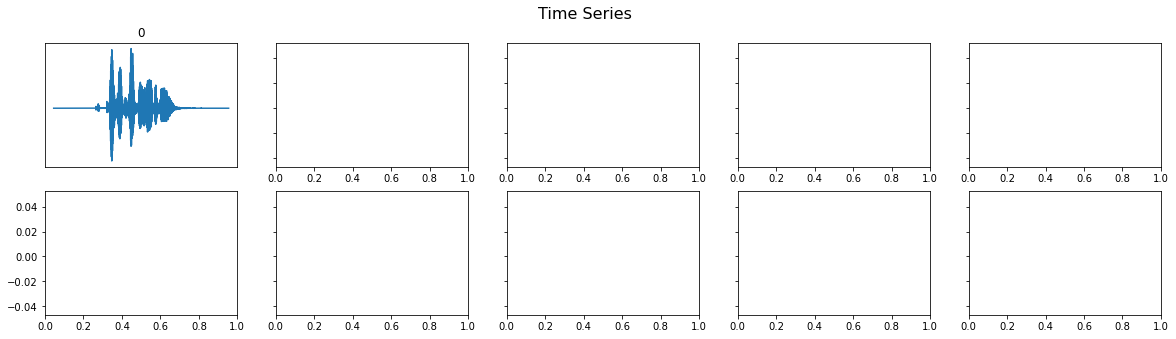

In [7]:
# Here The Data Set is loaded and plots are Visualised by Calling the Plotting Functions . 
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft
import numpy as np
for file in range(0 ,1, 1):
    rate, data = wav.read(listOfFiles[file])
    fft_out = fft(data)
    %matplotlib inline
    plt.plot(data, np.abs(fft_out))
    plt.show()
    
signals={}
fft={}
fbank={}
mfccs={}
# load data
for file in range(0 ,1, 1):
#     rate, data = wavfile.read(listOfFiles[file])
    signal,rate =librosa.load(listOfFiles[file] , sr=44100)
    mask = envelope(signal , rate , 0.0005)
    signals[file] = signal
    fft[file] = calc_fft(signal , rate)
    
    bank = logfbank(signal[:rate] , rate , nfilt = 26, nfft = 1103).T
    fbank[file] = bank
    mel = mfcc(signal[:rate] , rate , numcep =13 , nfilt = 26 , nfft=1103).T
    mfccs[file]=mel

plot_signals(signals)
plt.show()

plot_fft(fft)
plt.show()

plot_fbank(fbank)
plt.show()

plot_mfccs(mfccs)
plt.show()

In [8]:
#Now Cleaning Step is Performed where:
#DOWN SAMPLING OF AUDIO FILES IS DONE  AND PUT MASK OVER IT AND DIRECT INTO CLEAN FOLDER
#MASK IS TO REMOVE UNNECESSARY EMPTY VOIVES AROUND THE MAIN AUDIO VOICE 
def envelope(y , rate, threshold):
    mask=[]
    y=pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/10) ,  min_periods=1 , center = True).mean()
    for mean in y_mean:
        if mean>threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask

In [23]:
#The clean Audio Files are redirected to Clean Audio Folder Directory 
import glob,pickle
for file in tqdm(glob.glob(r'C:\Users\bhagw\fyp\Speech_Emotion_Detection\speech-emotion-recognition-ravdess-data\\**\\*.wav')):
    file_name = os.path.basename(file)
    signal , rate = librosa.load(file, sr=16000)
    mask = envelope(signal,rate, 0.0005)
    wavfile.write(filename= r'C:\Users\bhagw\fyp\Speech_Emotion_Detection\clean_speech\\'+str(file_name), rate=rate,data=signal[mask])

100%|██████████████████████████████████████████████████████████████████████████████| 1439/1439 [00:28<00:00, 50.25it/s]


In [9]:
#Feature Extraction of Audio Files Function 
#Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        result=np.hstack((result, mel))
    return result

In [10]:
#Emotions in the RAVDESS dataset to be classified Audio Files based on . 
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
#These are the emotions User wants to observe more :
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [12]:
#Load the data and extract features for each sound file
from glob import glob
import os
import glob
def load_data(test_size=0.33):
    x,y=[],[]
    answer = 0
    for file in glob.glob(r'.\clean_speech\\*.wav'):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            answer += 1
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append([emotion,file_name])
    y=np.array(y)
    print(y.shape)
    return train_test_split(np.array(x),y, test_size=0.2, random_state=9)

In [13]:
#Split the dataset
import librosa
import numpy as np
import warnings
warnings.filterwarnings('ignore')
x_train,x_test,y_train,y_test=load_data(test_size=0.25)
print(np.shape(x_train),np.shape(x_test), np.shape(y_train),np.shape(y_test))
y_test_map = np.array(y_test).T
y_test = y_test_map[0]
test_filename = y_test_map[1]
print(y_test_map[0])
y_train_map = np.array(y_train).T
y_train = y_train_map[0]
train_filename = y_train_map[1]
print(np.shape(y_train),np.shape(y_test))
print(*test_filename,sep="\n")

(768, 2)
(614, 180) (154, 180) (614, 2) (154, 2)
['fearful' 'happy' 'disgust' 'calm' 'disgust' 'fearful' 'disgust' 'calm'
 'fearful' 'fearful' 'calm' 'fearful' 'fearful' 'fearful' 'fearful'
 'happy' 'calm' 'disgust' 'happy' 'calm' 'calm' 'calm' 'happy' 'calm'
 'calm' 'calm' 'happy' 'happy' 'fearful' 'happy' 'fearful' 'disgust'
 'disgust' 'happy' 'fearful' 'disgust' 'fearful' 'disgust' 'disgust'
 'fearful' 'disgust' 'calm' 'happy' 'fearful' 'fearful' 'calm' 'fearful'
 'disgust' 'calm' 'calm' 'fearful' 'happy' 'happy' 'calm' 'disgust'
 'disgust' 'happy' 'calm' 'happy' 'calm' 'calm' 'happy' 'disgust'
 'fearful' 'calm' 'fearful' 'calm' 'happy' 'fearful' 'fearful' 'disgust'
 'calm' 'calm' 'calm' 'disgust' 'calm' 'happy' 'disgust' 'happy' 'disgust'
 'happy' 'happy' 'fearful' 'fearful' 'disgust' 'calm' 'fearful' 'disgust'
 'disgust' 'fearful' 'calm' 'happy' 'happy' 'happy' 'calm' 'calm' 'happy'
 'disgust' 'disgust' 'happy' 'disgust' 'disgust' 'calm' 'fearful' 'calm'
 'disgust' 'calm' 'calm' '

In [14]:
#Get the shape of the training and testing datasets
# print((x_train.shape[0], x_test.shape[0]))
print((x_train[0], x_test[0]))
#Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

(array([-3.71849243e+02,  1.03950974e+02, -1.03648453e+01,  2.67074356e+01,
       -1.33307552e+01, -2.88272071e+00, -1.04351406e+01, -2.57317200e+01,
       -1.02469435e+01, -9.71051025e+00, -1.88326950e+01, -4.04810143e+00,
       -6.45146799e+00, -3.63719010e+00, -1.21084709e+01, -1.13278837e+01,
       -4.40763712e+00, -6.89929295e+00, -1.19584866e+01, -5.74399757e+00,
       -9.20265675e+00, -6.02034235e+00, -4.20255232e+00, -8.33188057e+00,
       -4.72893572e+00, -1.83190978e+00, -2.18272066e+00, -5.80572557e+00,
       -4.53551102e+00, -5.75401878e+00, -4.69171381e+00, -3.73407054e+00,
       -3.58829319e-01, -4.58683300e+00, -6.25262737e+00, -3.86362648e+00,
       -5.56051683e+00, -3.10220671e+00, -6.32378721e+00, -5.91910124e+00,
        4.95410860e-01,  5.41045427e-01,  4.97207820e-01,  5.37204802e-01,
        5.74013352e-01,  5.28429389e-01,  5.19611955e-01,  6.18835568e-01,
        6.71098650e-01,  7.09589601e-01,  6.36909306e-01,  4.90902841e-01,
        3.31863375e-05, 

In [15]:
from sklearn.neural_network import MLPClassifier
# Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [16]:
#Train the model
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [17]:

#SAVING THE MODEL
import pickle
# Save the Modle to file in the current working directory
#For any new testing data other than the data in dataset

Pkl_Filename = "Emotion_Voice_Detection_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)

In [18]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Emotion_Voice_Detection_Model = pickle.load(file)

Emotion_Voice_Detection_Model

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [19]:
#predicting :
y_pred=Emotion_Voice_Detection_Model.predict(x_test)
y_pred

array(['disgust', 'happy', 'fearful', 'calm', 'disgust', 'calm',
       'disgust', 'calm', 'fearful', 'fearful', 'calm', 'fearful',
       'happy', 'fearful', 'fearful', 'happy', 'disgust', 'calm',
       'fearful', 'calm', 'calm', 'calm', 'happy', 'calm', 'calm', 'calm',
       'fearful', 'happy', 'disgust', 'calm', 'calm', 'calm', 'disgust',
       'happy', 'fearful', 'disgust', 'fearful', 'disgust', 'happy',
       'fearful', 'disgust', 'calm', 'happy', 'fearful', 'fearful',
       'calm', 'fearful', 'calm', 'calm', 'calm', 'disgust', 'happy',
       'happy', 'calm', 'disgust', 'disgust', 'disgust', 'calm', 'happy',
       'calm', 'calm', 'happy', 'disgust', 'fearful', 'calm', 'happy',
       'disgust', 'happy', 'fearful', 'fearful', 'fearful', 'calm',
       'calm', 'calm', 'fearful', 'calm', 'calm', 'happy', 'calm',
       'fearful', 'fearful', 'happy', 'fearful', 'fearful', 'disgust',
       'fearful', 'disgust', 'fearful', 'calm', 'fearful', 'calm',
       'fearful', 'happy', 'h

In [20]:
#Store the Prediction probabilities into CSV file 
import numpy as np
import pandas as pd
y_pred1 = pd.DataFrame(y_pred, columns=['predictions'])
y_pred1['file_names'] = test_filename
y_pred1['true'] = y_pred1["predictions"]
print(y_pred1)
y_pred1.to_csv('predictionfinal.csv')
print("Accuracy: ")

    predictions                file_names     true
0       disgust  03-01-06-01-02-02-01.wav  disgust
1         happy  03-01-03-01-02-01-21.wav    happy
2       fearful  03-01-07-01-02-02-04.wav  fearful
3          calm  03-01-02-02-01-02-24.wav     calm
4       disgust  03-01-07-01-02-02-19.wav  disgust
..          ...                       ...      ...
149        calm  03-01-07-01-01-01-08.wav     calm
150     disgust  03-01-07-01-01-01-11.wav  disgust
151     fearful  03-01-06-01-02-02-23.wav  fearful
152        calm  03-01-07-01-02-02-08.wav     calm
153     fearful  03-01-02-01-01-02-09.wav  fearful

[154 rows x 3 columns]
Accuracy: 


In [21]:
#RECORDED USING MICROPHONE:
import pyaudio
import wave

CHUNK = 1024 
FORMAT = pyaudio.paInt16 #paInt8
CHANNELS = 2 
RATE = 44100 #sample rate
RECORD_SECONDS = 4
WAVE_OUTPUT_FILENAME = "output10.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK) #buffer

print("* recording")
frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data) # 2 bytes(16 bits) per channel

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

ModuleNotFoundError: No module named 'pyaudio'

In [22]:
#The file 'output10.wav' in the next cell is the file that was recorded live using the code :
data, sampling_rate = librosa.load('output10.wav')
%matplotlib inline
import os
import pandas as pd
import librosa.display
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

FileNotFoundError: [Errno 2] No such file or directory: 'output10.wav'

In [31]:
## Appying extract_feature function on random file and then loading model to predict the result 
file = 'op12.wav'
# data , sr = librosa.load(file)
# data = np.array(data)
ans =[]
new_feature= extract_feature(file, mfcc=True, chroma=True, mel=True)
ans.append(new_feature)
ans = np.array(ans)
# data.shape

Emotion_Voice_Detection_Model.predict(ans)[0]



'disgust'